In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.shape

(200, 2)

In [4]:
df.sample(10)

,cgpa,package
126,5.91,2.60
159,8.71,4.08
73,8.44,4.03
154,7.08,2.85
93,6.79,3.08
129,7.29,3.12
150,6.30,2.73
174,7.32,2.99
135,6.10,2.60
139,7.19,2.40


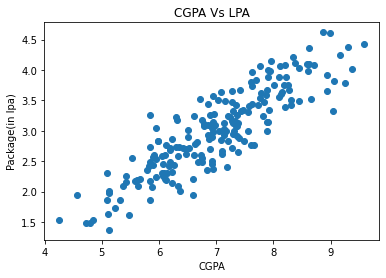

In [5]:
plt.scatter(df.cgpa,df.package)
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.title('CGPA Vs LPA')
plt.show()

In [6]:
X = df.iloc[:,0:1]
y = df.package

In [7]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [10]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
lr.predict(X_train.iloc[0].values.reshape(1,1))

array([3.08766517])

### Linear Regression plot

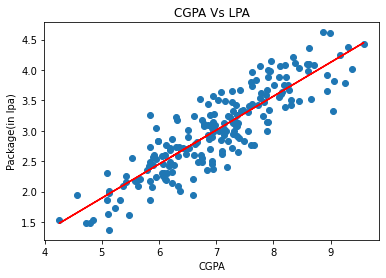

In [14]:
plt.scatter(df.cgpa,df.package)
plt.plot(df.cgpa,lr.predict(X),color='r')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.title('CGPA Vs LPA')
plt.show()

In [15]:
m = lr.coef_
b = lr.intercept_
print(m,b)

[0.55795197] -0.8961119222429144


In [16]:
# y = mx + b
m * 7.14 + b

array([3.08766517])

In [17]:
m * 9.9 + b

array([4.62761261])

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [20]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [21]:
y_pred = lr.predict(X_test)

In [22]:
print('MAE :', mean_absolute_error(y_test,y_pred))

MAE : 0.2884710931878175


In [23]:
print('MSE :', mean_squared_error(y_test,y_pred))

MSE : 0.12129235313495527


In [24]:
print('RMSE :', np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE : 0.34827051717731616


In [25]:
print('R2 Score :', r2_score(y_test,y_pred))

R2 Score : 0.780730147510384


In [26]:
# Adujsted R2 Score

adjusted_r2_score = 1- ((1-r2_score(y_test,y_pred))*(y_test.shape[0]-1))/(y_test.shape[0]-1-X_test.shape[1])
print('Adjusted r2 Score :', adjusted_r2_score)

Adjusted r2 Score : 0.7749598882343415


In [27]:
df1 = df.copy()
df1['random_feature'] = np.random.random(200)

df1 = df1[['cgpa','random_feature','package']]
df1.head()

,cgpa,random_feature,package
0,6.89,0.355068,3.26
1,5.12,0.345120,1.98
2,7.82,0.476015,3.25
3,7.42,0.866553,3.67
4,6.94,0.540475,3.57


### Adding Irrevelent column

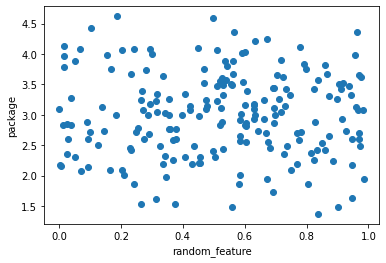

In [28]:
plt.scatter(df1.random_feature,df1.package)
plt.xlabel('random_feature')
plt.ylabel('package')
plt.show()

In [29]:
X = df1.iloc[:,0:-1]
X

,cgpa,random_feature
0,6.89,0.355068
1,5.12,0.345120
2,7.82,0.476015
3,7.42,0.866553
4,6.94,0.540475
...,...,...
195,6.93,0.682587
196,5.89,0.584037
197,7.21,0.663357
198,7.63,0.015933


In [30]:
y = df1.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('R2 Score :', r2_score(y_test,y_pred))
adjusted_r2_score = 1- ((1-r2_score(y_test,y_pred))*(y_test.shape[0]-1))/(y_test.shape[0]-1-X_test.shape[1])
print('Adjusted r2 Score :', adjusted_r2_score)

R2 Score : 0.7802134548476567
Adjusted r2 Score : 0.7683331010556381


In [32]:
df2 = df.copy()
df2['iq'] = df2['package'] + (np.random.randint(-12,12,200)/10)
df2 = df2[['cgpa','iq','package']]
df2.head()

,cgpa,iq,package
0,6.89,3.66,3.26
1,5.12,2.38,1.98
2,7.82,3.05,3.25
3,7.42,2.77,3.67
4,6.94,2.97,3.57


### Adding revelent column

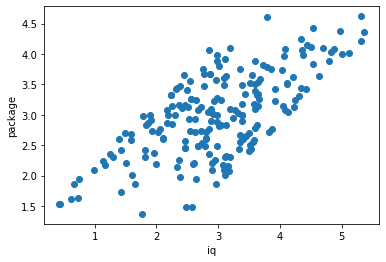

In [33]:
plt.scatter(df2.iq,df2.package)
plt.xlabel('iq')
plt.ylabel('package')
plt.show()

In [34]:
X = df2.iloc[:,0:-1]
y = df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('R2 Score :', r2_score(y_test,y_pred))
adjusted_r2_score = 1- ((1-r2_score(y_test,y_pred))*(y_test.shape[0]-1))/(y_test.shape[0]-1-X_test.shape[1])
print('Adjusted r2 Score :', adjusted_r2_score)

R2 Score : 0.828110359207139
Adjusted r2 Score : 0.8188190272723899
